# EBRAINS Neuromorphic services and HBP

- Ebrains https://ebrains.eu/ and the The Human Brain Project https://www.humanbrainproject.eu/en/
- In particular, see https://ebrains.eu/service/neuromorphic-computing/

- Digital computation / Simulation / SpiNNaker / neurons are software
- Analog computation / Emulation / BrainScales / neurons are hardware
    

## machine resources

- BrainScaleS
     - Kirchhoff Institut Für Physik, Heidelberg University, DE
     - physical (analogue or mixed-signal) emulations of neuron, synapse and plasticity models 
     - digital connectivity
     - ten thousand times faster than real time
     - access with https://wiki.ebrains.eu/bin/view/Collabs/neuromorphic/BrainScaleS/

<img align="center"      
     src="https://electronicvisions.github.io/hbp-sp9-guidebook/_images/6D_0073294_Racks_19WaferSystemsInstalled_30March2016_cropped_1000px.jpg" width="500" height="500" />

- SpiNNaker 
    - School of Computer Science, University of Manchester, UK
    - SpiNNaker (Spiking Neural Network Architecture) is a massively parallel manycore supercomputer 
    - numerical models running in real time on custom digital multicore chips
    - using the ARM architecture https://www.youtube.com/watch?v=EhPpxsK2Ia0
    - access with https://wiki.ebrains.eu/bin/view/Collabs/neuromorphic/SpiNNaker/

<img align="center"        
 src="https://www.zdnet.fr/i/edit/ne/2019/01/spinnaker-at-univ-manchester.jpg" width="500" height="500" />


# More info about SpiNNaker

- Jupyter Lab login at https://spinn-20.cs.man.ac.uk/hub/home

- It's composed of 57,600 processing nodes, each with 18 ARM9 processors and 128 MB of mobile DDR SDRAM, totalling 1,036,800 cores and over 7 TB of RAM

- The completed design is housed in 10 19-inch racks, with each rack holding over 100,000 cores

- Each core simulates 1,000 neurons (the goal is to simulate up to a billion neurons in real time)

- SpiNNaker requires about 100 kW from a 240 V supply and an air-conditioned environment

- SpiNNaker the hardware http://apt.cs.manchester.ac.uk/projects/SpiNNaker/

- sPyNNaker the software https://www.frontiersin.org/articles/10.3389/fnins.2018.00816/full

- Supported features http://spinnakermanchester.github.io/spynnaker/4.0.0/SPyNNakerLimitations.html
    
- PDF document https://spynnaker.readthedocs.io/_/downloads/en/latest/pdf/

- PDF short induction http://spinnakermanchester.github.io/spynnaker/4.0.0/RunningPyNNSimulationsonSpiNNaker-LabManual.pdf

- SpiNNaker mailing list google https://groups.google.com/g/spinnakerusers?pli=1

- Youtube video https://www.youtube.com/watch?v=V3MlOAru6Qk

- comparison among SpiNNaker and NEST with HPC,  van Albada et al 2018 https://www.frontiersin.org/articles/10.3389/fnins.2018.00291/full

> With approximately 80, 000 neurons and 0.3 billion synapses, this model is the largest simulated on SpiNNaker to date. (...) Comparison with simulations using the NEST software on a high-performance cluster shows that both simulators can reach a similar accuracy, despite the fixed-point arithmetic of SpiNNaker, demonstrating the usability of SpiNNaker for computational neuroscience applications with biological time scales and large network size.

# Info about PyNN 

![](https://neuralensemble.org/static/photos/pynn_logo.png)

- A Python package for simulator-independent specification of neuronal network models

- PyNN works with multiple simulators (SpiNNaker, NEST, Brain, Neuron, etc)

- If you want to install install PyNN on your local machine, see info http://neuralensemble.org/docs/PyNN/installation.html

- Paper https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2634533/

- PyNN website http://neuralensemble.org/docs/PyNN/index.html

- PyNN mailing list https://groups.google.com/g/neuralensemble



# Goal of this tutorial on PyNN

- Learn code elements to run a Spiking Neural Networks (SNNs) by using PyNN on the SpiNNaker neuromorphic system.


## knowledge assumptions: 

- basis of spiking neural network theory (https://neuronaldynamics.epfl.ch/online/index.html)
- familiarity with physical quatities related to electric circuits (e.g., voltages, conductances, currents, capacitances, etc)
- basic python coding (numpy, work with dictionaries, some matplotlib tools, etc)

# Content:

## network building and running 
1. neurons
    - cell types
    - populations
    - recording variables
    
2. connections
    - synapse types
    - connections types
    - projections

3. simulation managing
    - computational settings
    - save and load outputs
    - visualization tools

## expected take-home-points:

0. import the simulator
1. setup the simulator
2. decide the cell types 
3. design the populations
4. define the synapse types
5. select the connection algorithm
6. make the projections 
7. idealize the stimulus
8. run the simulation
9. save the results
10. recover the results
11. postprocessing (visualization or statistics, etc)
12. close the simulations

# step0: import the simulator

In [1]:
# fileName

fileName = 'CNT_notebook' 

In [2]:
try:
    import pyNN.spiNNaker as sim
except ModuleNotFoundError:
    import pyNN.brian2 as sim
    
from pyNN import space 
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pickle
import pandas as pd
import seaborn as sns
import time
import datetime
import json
import warnings
warnings.filterwarnings('ignore')
import python_utils as pu
%matplotlib inline

savePath = f'./outputs/' # remember to create the folder if not already present (mkdir ./notebooks/outputs)
dt_string = datetime.datetime.today().isoformat() # ISO8601 ! :-)
tag = dt_string 
saveName = f'{savePath}{fileName}-{tag}'
print(saveName)
PARS={}

# note that if you use nest/brian2 import pyNN.nest as sim / import pyNN.brian2 as sim (see http://neuralensemble.org/docs/PyNN/backends.html)

./outputs/CNT_notebook-2024-04-22T19:31:00.601065


In [3]:
# sim + tab key to explore PyNN features (classes, modules, functions, instances)

# have a try...
# sim.

# step1: setup the simulator

In [4]:
timestep=1 #[ms]
sim.setup(
    timestep=timestep, # [ms]
    min_delay=timestep, # [ms]
    max_delay=timestep*144) # [ms] # not that the max_delay supported by SpiNNaker is timestep * 144


0

# step2: the cell types 

- cell models and source models
- point neuron (mono-compartment model)
- http://neuralensemble.org/docs/PyNN/standardmodels.html

In [5]:
sim.list_standard_models()

['StandardCellType',
 'IF_curr_alpha',
 'IF_curr_exp',
 'IF_curr_delta',
 'IF_cond_alpha',
 'IF_cond_exp',
 'EIF_cond_exp_isfa_ista',
 'EIF_cond_alpha_isfa_ista',
 'IF_cond_exp_gsfa_grr',
 'HH_cond_exp',
 'Izhikevich',
 'SpikeSourcePoisson',
 'SpikeSourceArray',
 'PointNeuron']

- example of the different cell spike traces in [testing cell models network](eg_testing-cell-models-network.ipynb)


## e.g., with sim.IF_cond_exp 

- Leaky integrate and fire model with fixed threshold and decaying-exponential post-synaptic conductance.
- as used in this bump model: https://arxiv.org/pdf/2003.13365.pdf
- good model ref: https://pubmed.ncbi.nlm.nih.gov/17629781/

In [6]:
# parameter names

sim.IF_cond_exp.get_parameter_names()

['v_rest',
 'cm',
 'tau_m',
 'tau_refrac',
 'tau_syn_E',
 'tau_syn_I',
 'e_rev_E',
 'e_rev_I',
 'v_thresh',
 'v_reset',
 'i_offset']

In [7]:
# default parameters

standard_pars = sim.IF_cond_exp.default_parameters

standard_pars

# see parameters of the models http://neuralensemble.org/docs/PyNN/standardmodels.html

{'v_rest': -65.0,
 'cm': 1.0,
 'tau_m': 20.0,
 'tau_refrac': 0.1,
 'tau_syn_E': 5.0,
 'tau_syn_I': 5.0,
 'e_rev_E': 0.0,
 'e_rev_I': -70.0,
 'v_thresh': -50.0,
 'v_reset': -65.0,
 'i_offset': 0.0}

In [8]:
# define your own pars, 

testing_pars = {'tau_m': 20, 
                'cm': 1.0, 
                'v_rest': -60.0, 
                'v_reset': -60.0, 
                'v_thresh': -50.0, 
                'tau_syn_E': 5.0, 
                'tau_syn_I': 10.0, 
                'tau_refrac': 5, 
                'i_offset': 0.0, 
                'e_rev_E': 0.0, 
                'e_rev_I': -80.0}

In [9]:
# initial values

sim.IF_cond_exp().default_initial_values

{'v': -65.0, 'gsyn_exc': 0.0, 'gsyn_inh': 0.0}

# step3: making cell populations


In [10]:
# define dictionaries and settings

pops = {} # populations of exc and inh cells
n_cells = {} # specific number of exc or inh cells in pops
neuron_Model = {} # model of neuron adopted for the simulation
neuron_ModelPars = {} # model parameters 
initial_Values = {} # initial values of state variables (membrane potential and conductances)

In [11]:
# define the popolation of excitatory neurons 


popName = 'exc'

n_cells[popName] = 800
neuron_Model[popName] = sim.IF_cond_exp
neuron_ModelPars[popName] = testing_pars # or standard_pars or testing_pars
initial_Values[popName] = sim.IF_cond_exp.default_initial_values

pops[popName] = sim.Population(n_cells[popName], 
                               neuron_Model[popName],
                               neuron_ModelPars[popName],
                               structure = space.Line(dx=1.0, x0=0.0, y=0.0, z=0.0), 
                               initial_values={}, # e.g, initial_values={'v': sim.RandomDistribution('uniform', (-70.0, -60.0))},
                               label = popName)

pops[popName].record(['spikes','v','gsyn_exc','gsyn_inh'])   

print('the total number of excitatory cells is: ', pops['exc'].size)

the total number of excitatory cells is:  800


In [12]:
# define a popolation of inhibitory neurons in 1D

popName = 'inh'

n_cells[popName] = 200  # number of inhibitory cells
neuron_Model[popName] = sim.IF_cond_exp
neuron_ModelPars[popName] = testing_pars # or standard_pars or testing_pars
initial_Values[popName] = sim.IF_cond_exp.default_initial_values

pops[popName] = sim.Population(n_cells[popName], 
                               neuron_Model[popName],
                               neuron_ModelPars[popName],
                               structure = space.Line(dx=1.0, x0=0.0, y=0.0, z=0.0), 
                               initial_values={}, # e.g, initial_values={'v': sim.RandomDistribution('uniform', (-70.0, -60.0))},
                               label = popName)

pops[popName].record(['spikes','v','gsyn_exc','gsyn_inh']) 

print('the total number of inhibitory cells is: ', pops['inh'].size)

the total number of inhibitory cells is:  200


In [13]:
# the population dictionary

pops

{'exc': Population(800, IF_cond_exp(<parameters>), structure=Line(dx=1.0, x0=0.0, y=0.0, z=0.0), label='exc'),
 'inh': Population(200, IF_cond_exp(<parameters>), structure=Line(dx=1.0, x0=0.0, y=0.0, z=0.0), label='inh')}

In [14]:
# eventually defined random subsets of cells from the the population 

do_run = False
if do_run:
    pops['subsetA'] = pops['exc'].sample(75) 
    pops['subsetB'] = pops['inh'].sample(25) 

    pops['subsetA'].record(['spikes','v','gsyn_exc','gsyn_inh'])
    pops['subsetB'].record(['spikes','v','gsyn_exc','gsyn_inh'])

In [15]:
# check initial values

pops['exc'].initial_values

{'v': <larray: base_value=-65.0 shape=(800,) dtype=<class 'float'>, operations=[]>,
 'gsyn_exc': <larray: base_value=0.0 shape=(800,) dtype=<class 'float'>, operations=[]>,
 'gsyn_inh': <larray: base_value=0.0 shape=(800,) dtype=<class 'float'>, operations=[]>}

the total number of excitatory cells is:  800


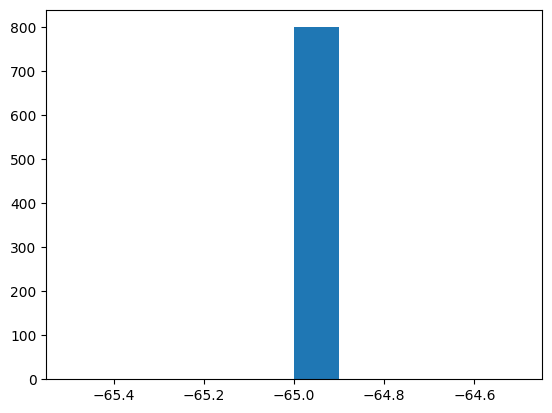

In [16]:
pops['exc'].initial_values['v'] # voltage

plt.hist(list(pops['exc'].initial_values['v']), 10)
print('the total number of excitatory cells is: ', pops['exc'].size)


KeyboardInterrupt

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f53ee9cfdc0>>
Traceback (most recent call last):
  File "/home/bbpnrsoa/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


Error in callback <function _draw_all_if_interactive at 0x7f531699daf0> (for post_execute):


KeyboardInterrupt: 

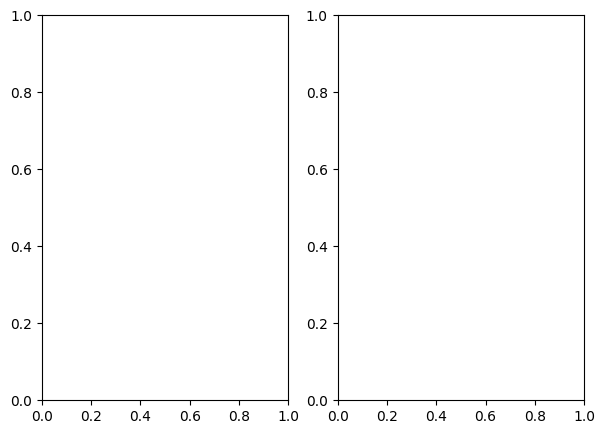

In [17]:
# change initial values, e.g., voltage

pops['exc'].initialize(v = sim.RandomDistribution('normal', (-65.0, 2.0)))
pops['exc'].initial_values['v'] # voltage

# visual check of the custom voltage initial distribution

fig, axes = plt.subplots(1,2, figsize=(7,5))
axes_list = fig.axes

axes_list[0].hist(list(pops['exc'].initial_values['v']),
                  bins = 50,
                  cumulative = True)

axes_list[0].set_title('CDF of voltage [mV]')

axes_list[1].hist(list(pops['exc'].initial_values['v']),
                  density = True,
                  bins = 50,
                  cumulative = False)


axes_list[1].set_title('discrete PDF of voltage [mV]')

In [ ]:
# some info to define network with 1D or 2D or 3D structures 
# remember cells are point model in on a discretized line, surface or volume

"""
pops[popName] = sim.Population(n_cells[popName], 
                               neuron_Model[popName],
                               neuron_ModelPars[popName],
                               structure = space.Line(dx=1.0, x0=0.0, y=0.0, z=0.0), 
                               initial_values=None, # e.g, initial_values={'v': sim.RandomDistribution('uniform', (-70.0, -60.0))},
                               label = popName)
"""




structure = {}

structure['1D'] = space.Line(
                              dx=1.0, 
                              x0=0.0, 
                              y=0.0, 
                              z=0.0),

structure['2D'] = space.Grid2D(
                                aspect_ratio=1.0,
                                dx=1.0,
                                dy=1.0,
                                x0=0.0,
                                y0=0.0,
                                z=0,
                                fill_order='sequential', #'random'
                                rng=None,
                                )

structure['3D'] = space.Grid3D(
                                aspect_ratioXY=1.0,
                                aspect_ratioXZ=1.0,
                                dx=1.0,
                                dy=1.0,
                                dz=1.0,
                                x0=0.0,
                                y0=0.0,
                                z0=0.0,
                                fill_order='sequential', # 'random'
                                rng=None,
                                )

structure['Sphere'] = space.RandomStructure(
                                            boundary=space.Sphere(radius=5000), 
                                            origin=(0.0, 0.0, 0.0), 
                                            rng=None)


structure['Cuboid'] = space.RandomStructure(
                                            boundary=space.Cuboid(
                                                                width=10000, 
                                                                height=10000, 
                                                                depth=10000), 
                                                                origin=(0.0, 0.0, 0.0), 
                                                                rng=None)


# to explore the actual position of the cells:
print('the position of the 1st cell in a 3D structure is: ', list(structure['Cuboid'].generate_positions(n=1)))


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(121, projection='3d')
x=structure['Sphere'].generate_positions(n=1000)[0]
y=structure['Sphere'].generate_positions(n=1000)[1]
z=structure['Sphere'].generate_positions(n=1000)[2]
im=ax.scatter(x, y, z)
im=ax.set_title('Sphere')
im=ax.set_xlabel('width')
im=ax.set_ylabel('height')
im=ax.set_zlabel('depth')
# check radius with 10,100,1000

ax = fig.add_subplot(122, projection='3d')
x=structure['Cuboid'].generate_positions(n=1000)[0]
y=structure['Cuboid'].generate_positions(n=1000)[1]
z=structure['Cuboid'].generate_positions(n=1000)[2]
im=ax.scatter(x, y, z)
im=ax.set_title('Cuboid')
im=ax.set_xlabel('width')
im=ax.set_ylabel('height')
im=ax.set_zlabel('depth')
# check resizing width, height and depth (special cases of 1D and 2D and 3D)

#len(structure['Cuboid'].generate_positions(n=10)[0])
#structure['Cuboid'].generate_positions(n=10)
# The library has a representation of the [topology of the network](http://neuralensemble.org/docs/PyNN/reference/space.html) :

# step4: synapses types 

In [ ]:
# static synapse weight and delay

weights = np.random.normal(loc=0.04, scale=0.01)
static_synapse = sim.StaticSynapse(weight=weights, delay=0.5) # weights in [uS] and delay in [ms]

# note1: if you use a model with current based synapses, the weights are in nA, 
# otherewise are uS for conductance based synapses models 

In [ ]:
# long term / spike-timinig-dependend plasticity (STDP), i.e. learning

stdp_synapse = sim.STDPMechanism(
                                 timing_dependence=sim.SpikePairRule(tau_plus=20.0, tau_minus=20.0, A_plus=0.1, A_minus=0.1),
                                 weight_dependence=sim.AdditiveWeightDependence(w_min=0.0, w_max=1.0),
                                 voltage_dependence=None,
                                 dendritic_delay_fraction=1.0,
                                 weight = 0.05, # initial value
                                 delay = "0.5 + 0.01*d", # distance based delay min_delay + f(distance)
                                 )

# see for details http://neuralensemble.org/docs/PyNN/connections.html#synapse-types

- have a look to [testing STDP model network notebook](eg_testing-STDP-model-network.ipynb)

In [ ]:
# other learning rules

# sim.extra_models.SpikeNearestPair
# sim.extra_models.PfisterSpikeTripletRule
# sim.extra_models.Vogels2011Rule
# sim.extra_models.RecurrentRule

# info at http://spinnakermanchester.github.io/spynnaker/5.0.0/SPyNNakerModelsAndLimitations.html

# step5: connectors types 


In [ ]:
# all to all connections

connector = sim.AllToAllConnector(allow_self_connections=True) # autapses=True

In [ ]:
# all to all connections with probability

prob = 0.25 # point prob
prob = np.random.normal(loc=0.5, scale=0.1) # distribution of prob
connector = sim.FixedProbabilityConnector(p_connect=prob)

In [ ]:
# distance based probability connections

d_rule = "exp(-d)" # or d_expression = "d<5"
connector = sim.DistanceDependentProbabilityConnector(d_expression=d_rule)

In [ ]:
# one to one connections

connector = sim.OneToOneConnector()

In [ ]:
# fixed number of pre synptic neurons randomly taken link to all pre syn neurons

connector = sim.FixedNumberPreConnector(n = 50, allow_self_connections=True)

In [ ]:
# fixed number of post synptic neurons randomly taken link to all post syn neurons

connector = sim.FixedNumberPostConnector(n = 50, allow_self_connections=True)

In [ ]:
# small-world connections

do_run = False
if do_run:
    connector = sim.SmallWorldConnector(
                                    degree, # the region length where nodes will be connected locally
                                    rewiring, # the probability of rewiring each edge
                                    allow_self_connections=True,
                                    safe=True,
                                    verbose=False,
                                    n_connections=None, # if specified, the number of efferent synaptic connections per neuron
                                    )


see example [small-world network notebook](eg_small-world-network.ipynb)


In [ ]:
# CSA Connection Set Algebra constructor ( Djurfeldt 2012 https://pubmed.ncbi.nlm.nih.gov/22437992/)

do_run = False
if do_run:
    #cset = a connection set object
    connector = CSAConnector(cset, safe=True, callback=None)


In [ ]:
# from file to connector, i.e., [i, j, weight, delay]

do_run = False
if do_run:
    file = 'yourFile.txt'
    connector = sim.FromFileConnector(
                                    file,
                                    distributed=False,
                                    safe=True,
                                    callback=None,
                                    verbose=False,
                                )

In [ ]:
# list based connections, i.e., [i, j, weight, delay]

# one-to-one like list
#            [i, j,  w,   d]
givenList = [[0, 0, 0.08, 1],
             [1, 1, 0.08, 1],
             [2, 2, 0.08, 1],
             [3, 3, 0.08, 1],
             [4, 4, 0.08, 1]]
             #...

connector = sim.FromListConnector(conn_list=givenList)

# powerful tool to draw your own connectivity

## Example of a function to compute a list for the FromListConnector

## e.g., list of Distance based Probability Connections with Distance based Delay (DPCDD)

In [ ]:
def compute_DPCDD(n_cells_i, n_cells_j, weights, d_thresh, p_thresh, width): 
    
    v_c = 0.35 # mm/ms
    d0 = 1 # ms
    scale = 1
    
    connections = {}
    probabilities = {}
    distances = {}

    connections = []
    probabilities = []
    distances = []
    for pre in range(n_cells_i):
        for post in range(n_cells_j):
            d_ij = np.sqrt((pre - post)**2)
            delay = d0 + d_ij / v_c # i.e., v = s/t -> t = s/v
            if d_ij > d_thresh: 
                distances.append(d_ij)
                p_ij = scale*np.exp(-0.5 * (d_ij**2/width**2))
                probabilities.append(p_ij)

                if p_ij > p_thresh:
                    connections.append([pre, post, weights, delay])#, [d_ij, p_ij]])

    return connections, distances, probabilities

## operative example: center-surround connections 

In [ ]:
# -> see https://link.springer.com/referenceworkentry/10.1007%2F978-1-4614-6675-8_569)
# -> see http://www.scholarpedia.org/article/Neural_inhibition

In [ ]:
# define parameters

n_cell = {'excitatory': pops['exc'].size, 'inhibitory': pops['inh'].size}
weights = {'excitatory': 0.008, 'inhibitory': 0.008}
d_thresh = {'excitatory': 0, 'inhibitory': 2} 
p_thresh = {'excitatory': 0.1, 'inhibitory': 0.1}
width = {'excitatory': 1, 'inhibitory': 3}

connections = {}
distances = {}
probabilities = {}

for synapse_type in ['excitatory', 'inhibitory']:
    connections[synapse_type], distances[synapse_type], probabilities[synapse_type] = compute_DPCDD(
                                                                                                    n_cell[synapse_type], 
                                                                                                    n_cell[synapse_type], 
                                                                                                    weights[synapse_type], 
                                                                                                    d_thresh[synapse_type], 
                                                                                                    p_thresh[synapse_type],
                                                                                                    width[synapse_type])

#########################################################################################################################
# visual check
fig, ax = plt.subplots(1,3, figsize=(11,5))
fig.tight_layout(pad=3)
axes_list = fig.axes

axes_list[0].plot(np.asarray(connections['excitatory']).T[0], np.asarray(connections['excitatory']).T[1],'go', label='excitatory cells')
axes_list[0].plot(np.asarray(connections['inhibitory']).T[0], np.asarray(connections['inhibitory']).T[1],'r+', label='inhibitory cells')
axes_list[0].grid()
axes_list[0].legend()
axes_list[0].set_title('scatter plot of connections')
axes_list[0].set_xlabel('i cells')
axes_list[0].set_ylabel('j cells')
axes_list[0].set_xlim(20,40)
axes_list[0].set_ylim(20,40)

axes_list[1].plot(distances['excitatory'],probabilities['excitatory'],'g+')
axes_list[1].plot(distances['inhibitory'],probabilities['inhibitory'],'r+') 
axes_list[1].plot(np.arange(0, 50), 1*np.exp(-0.5 * (np.arange(0, 50)**2/width['excitatory']**2)), 'g:')
axes_list[1].plot(np.arange(0, 50), 1*np.exp(-0.5 * (np.arange(0, 50)**2/width['inhibitory']**2)), 'r:')
axes_list[1].grid()
axes_list[1].set_xlim(0,15)
axes_list[1].set_ylim(0,1)
axes_list[1].axhline(p_thresh['excitatory'], color='k', label='p_threshold', )
axes_list[1].set_title('probability as function of distance')
axes_list[1].set_xlabel('distance')
axes_list[1].set_ylabel('probability')
axes_list[1].legend()

p=axes_list[2].hist(np.asarray(connections['excitatory']).T[3], bins=10, color='green', label='excitatory cells')
p=axes_list[2].hist(np.asarray(connections['inhibitory']).T[3], bins=10, color='r', label='inhibitory cells')
axes_list[2].set_xlabel('delay [ms]')
axes_list[2].legend()
axes_list[2].set_title('histogram of delays')
# Plots show connections with 2 cells local excitation and 4 cells surrounding inhibition, no autapses

In [ ]:
# e.g., i, j, weights, delays

connections['excitatory'][0:10]

In [ ]:
# e.g., i, j, weights, delays

connections['inhibitory'][0:10]

In [ ]:
# check the linearity of the delay
do_run = True

if do_run:

    %matplotlib inline
    d0=1
    v_c=0.3

    d_ij=[]
    delay_ij=[]
    for pre in range(100):
        for post in range(100):
            d_ij_ = np.sqrt((pre - post)**2)
            delay_ = d0 + d_ij_ / v_c # v = s/t -> t = s/v
            d_ij += [d_ij_]
            delay_ij += [delay_]

    plt.plot(d_ij, delay_ij)
    plt.xlabel('distance [au]')
    plt.ylabel('delay [ms]')

# step6: designing projections

In [ ]:
# making general connections 

from pyNN.random import NumpyRNG, RandomDistribution

pconn = 0.02
rngseed = 98766987
rng = NumpyRNG(seed=rngseed, parallel_safe=True)

exc_cells = pops['exc']
inh_cells = pops['inh']
w_exc = 0.04 # uS
w_inh = 0.51 # uS
delay = 2 # ms

exc_conn = sim.FixedProbabilityConnector(pconn, rng=rng)
inh_conn = sim.FixedProbabilityConnector(pconn, rng=rng)

connections = {
    
    'e2e': sim.Projection(
        exc_cells, 
        exc_cells, 
        exc_conn, 
        #space=space,
        receptor_type='excitatory',#!!!!!!!!!!
        synapse_type=sim.StaticSynapse(weight=w_exc, delay=delay)),
    
    'e2i': sim.Projection(
        exc_cells, 
        inh_cells,
        exc_conn,
        #space=space,
        receptor_type='excitatory',
        synapse_type=sim.StaticSynapse(weight=w_exc, delay=delay)),
    
    'i2e': sim.Projection(
        inh_cells,
        exc_cells, 
        inh_conn, 
        #space=space,
        receptor_type='inhibitory',
        synapse_type=sim.StaticSynapse(weight=w_inh, delay=delay)),
    
    'i2i': sim.Projection(
        inh_cells, 
        inh_cells, 
        inh_conn,
        #space=space,
        receptor_type='inhibitory',
        synapse_type=sim.StaticSynapse(weight=w_inh, delay=delay))

        }

connections

In [ ]:
# note for the the space arg with 2 or 3 dimensions

"""
pops[popName] = sim.Population(n_cells[popName], 
                               neuron_Model[popName],
                               neuron_ModelPars[popName],
                               structure = space.Line(dx=1.0, x0=0.0, y=0.0, z=0.0), 
                               initial_values=None, # e.g, initial_values={'v': sim.RandomDistribution('uniform', (-70.0, -60.0))},
                               label = popName)

"""


s = {}
s['1D'] = space.Space(axes = 'x')
s['2D'] = space.Space(axes = 'xy')
s['3D'] = space.Space(axes = 'xyz')
s['Sphere'] = space.Space(axes = 'xyz')
s['Cuboid'] = space.Space(axes = 'xyz')


# step7: setting the thalamic stimulus

In [ ]:
# manual function 
#
# define the list of spike sources, e.g, with a gaussian input 

n_cells['thalamus' ] = n_cells['exc']
spike_times = [[]]*n_cells['thalamus' ] #list of spike lists, where one spike list is related to one spike source

# randomly select the id source
random_sources_idx = [np.random.randint(n_cells['thalamus' ]*0.45, n_cells['thalamus' ]*0.65) for i in range(n_cells['thalamus' ])]

# randomly assign for each id source a sequence of spike times, i.e., when the cell spikes
for idx, sources in enumerate(random_sources_idx):
    spike_times[sources] = np.sort([np.random.normal(loc=500, scale=100) for n in range(5)])

spike_times
%matplotlib inline
a = plt.eventplot(spike_times)
plt.xlabel('[ms]')
plt.ylabel('Thalamic cells')
plt.title('Raster plot of input spike sources')
plt.xlim(0, 1000)

#spike_times[400:600]
# add plot spikes/sec

In [ ]:
# define the spike sources populations and projections

do_run = False

if do_run:
    neuron_Model['thalamus' ] = sim.SpikeSourceArray(spike_times=spike_times)

    pops['thalamus' ] = sim.Population(n_cells['thalamus' ], 
                                   neuron_Model['thalamus' ],
                                   label = 'Thalamus' )
                                  # add spatial constraint


    connections['t2e'] = sim.Projection(pops['thalamus'], pops['exc'],
                                               connector = sim.OneToOneConnector(),
                                               synapse_type = sim.StaticSynapse(weight=0.08, delay=1),
                                               receptor_type = 'excitatory',
                                                #space=<pyNN.space.Space object at 0x7ff8f25a2110>,
                                               label = 'thalamus-exc connections'
                                                )
    connections['t2i'] = sim.Projection(pops['thalamus'], pops['inh'],
                                           connector = sim.OneToOneConnector(),
                                           synapse_type = sim.StaticSynapse(weight=0.08, delay=1),
                                           receptor_type = 'excitatory',
                                            #space=<pyNN.space.Space object at 0x7ff8f25a2110>,
                                           label = 'thalamus-inh connections'
                                            )


In [ ]:
# otherwise define a spike sources from poisson process

do_run = False

if do_run:
    stim_dur = 50.    # (ms) duration of random stimulation
    rate = 100.       # (Hz) frequency of the random stimulation
    
    ext_stim = sim.Population(
        20, 
        sim.SpikeSourcePoisson(rate=rate, duration=stim_dur),
        label="expoisson")
    
    rconn = 0.01
    ext_conn = sim.FixedProbabilityConnector(rconn)
    ext_stim.record("spikes")

    connections['ext2e'] = sim.Projection(
        ext_stim, 
        exc_cells, 
        ext_conn,
        receptor_type='excitatory',
        synapse_type=sim.StaticSynapse(weight=0.1))
    
    connections['ext2i'] = sim.Projection(
        ext_stim, 
        inh_cells,
        ext_conn,
        receptor_type='excitatory',
        synapse_type=sim.StaticSynapse(weight=0.1))
    
#connections

# step8: run simulation

In [ ]:
do_run = False
if do_run:
    simtime = 1000 #ms
    sim.run(simtime) # time_bins=200 [ms]

# wait some minuts and it prints several info about HW and SW...

# step9: save results in a folder

In [ ]:
stateVars = {}
for pop in pops.keys():
    for recording in ['v', 'gsyn_inh', 'gsyn_exc', 'spikes']:
        pops[pop].write_data(f'{saveName}-{recording}.pkl')
        stateVars[pop]=pops[pop].get_data()
        

# step10: recover results

In [ ]:
stateVars.keys()
results = pu.recover_results(stateVars)
results.keys()

# step11: postprocessing (looking the results)

In [ ]:
# eventually import pkl files or use matplolib tools (see examples to plot voltage, spikes, conductances, etc)

do_run = False
if do_run:
    import pickle
    
    # e.g., 
    with open('Exc_v.pkl', 'rb') as f:
            data = pickle.load(f)


# step12: close simulation


In [ ]:
do_run = False
if do_run:
    sim.end()

## learn-by-examples 

- [entry network](eg_entry-network.ipynb)
- [single cell](eg_single-cell.ipynb)
- [single clique](eg_single-clique.ipynb)
- [decaying network](eg_decaying-network.ipynb)
- [diverging network](eg_diverging-network.ipynb)
- [persistent network](eg_persistent-network.ipynb)
- [small-world network](eg_small-world-network.ipynb)
- [testing cell models network](eg_testing-cell-models-network.ipynb)
- [testing STDP model network](eg_testing-STDP-model-network.ipynb)
- [VA_balance network](paper_balance-network.ipynb)



# learn-with-exercices 
- [ex_network_A](ex_network_A.ipynb), i.e., a 1D network of 100 cells that receives a sequence of random thalamic inputs
- [ex_network_B](ex_network_B.ipynb), i.e., a 2D network of 900 excitatory cells that receives a sequence of 2D geometric thalamic inputs


# learn-from-scratch

- create equivalent or extended PyNN functions by using numpy, e.g., specially for peculiar type of connectivities (use [FromListConnector](http://neuralensemble.org/docs/PyNN/reference/connectors.html#pyNN.connectors.FromListConnector))
- explore boundary conditions in 1D by comparing open and close ring networks (define properly the list of connections)
- compare two populations of different cell models and observe their difference on reacting to a stimulus
- create a network to make a deep signal processing with statistics, data analysis, and exploration of the frequency domain (FFT, HHT)
- design a set of stimuli with different onset timing and shape and test them on a simple network
- take one [example](http://neuralensemble.org/docs/PyNN/examples.html) from the PyNN website made for NEST and adapt to run on SpiNNaker
- take one example from the learn-by-examples section and extend it in 2D or 3D  
- use the notebook called [eg_blank_network](eg_blank-network.ipynb) and start your personal simulations!
